# Analiza przestępczości w Polsce 

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Ładowanie danych - GUS

In [238]:
df = pd.read_csv('data_crimes.csv',sep=";", quotechar='"')

print(df)

                  Nazwa  1 kwartał;przestępstwa stwierdzone;ogółem;2016;[-]  \
0                POLSKA                                             181162    
1          DOLNOŚLĄSKIE                                              17437    
2    KUJAWSKO-POMORSKIE                                               8804    
3             LUBELSKIE                                               6655    
4              LUBUSKIE                                               6037    
5               ŁÓDZKIE                                              10733    
6           MAŁOPOLSKIE                                              18748    
7           MAZOWIECKIE                                              24765    
8              OPOLSKIE                                               4157    
9          PODKARPACKIE                                               4826    
10            PODLASKIE                                               4114    
11            POMORSKIE                             

# Preprocessing

### Zmienianie kolumn na wiersze

In [266]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: Nazwa
1: 1 kwartał;przestępstwa stwierdzone;ogółem;2016;[-]
2: 1 kwartał;przestępstwa stwierdzone;ogółem;2017;[-]
3: 1 kwartał;przestępstwa stwierdzone;ogółem;2018;[-]
4: 1 kwartał;przestępstwa stwierdzone;ogółem;2019;[-]
5: 1 kwartał;przestępstwa stwierdzone;ogółem;2020;[-]
6: 1 kwartał;przestępstwa stwierdzone;ogółem;2021;[-]
7: 1 kwartał;przestępstwa stwierdzone;ogółem;2022;[-]
8: 1 kwartał;przestępstwa stwierdzone;ogółem;2023;[-]
9: 1 kwartał;przestępstwa stwierdzone;ogółem;2024;[-]
10: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2016;[-]
11: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2017;[-]
12: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2018;[-]
13: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2019;[-]
14: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2020;[-]
15: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2021;[-]
16: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminal

In [267]:
df_long = df.melt(id_vars=['Nazwa'],    #zostawiamy
                  var_name='Okres',     #Nowa Kolumna
                  value_name='Liczba')  #Kolumna dla wartości

df_long

,Nazwa,Okres,Liczba
0,POLSKA,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,181162.0
1,DOLNOŚLĄSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,17437.0
2,KUJAWSKO-POMORSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,8804.0
3,LUBELSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,6655.0
4,LUBUSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,6037.0
...,...,...,...
10399,ŚLĄSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,4876.0
10400,ŚWIĘTOKRZYSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,1271.0
10401,WARMIŃSKO-MAZURSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,4404.0
10402,WIELKOPOLSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,7953.0


In [268]:
column_parts = df_long['Okres'].str.split(';', expand=True)
column_parts

,0,1,2,3,4
0,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
1,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
2,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
3,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
4,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
...,...,...,...,...,...
10399,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10400,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10401,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10402,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]


In [269]:
df_long['Kwartał'] = column_parts[0] 
df_long['Przestępstwo'] = column_parts[2]
df_long['Rok'] = column_parts[3]
df_long['Województwo'] = df_long['Nazwa']

# Final DataFrame
df_final = df_long[['Województwo', 'Przestępstwo', 'Kwartał', 'Rok', 'Liczba']]

# Sorting
finadf_finall_df = df_final.sort_values(['Województwo', 'Kwartał'])


df_final.head(15)

,Województwo,Przestępstwo,Kwartał,Rok,Liczba
0,POLSKA,ogółem,1 kwartał,2016,181162.0
1,DOLNOŚLĄSKIE,ogółem,1 kwartał,2016,17437.0
2,KUJAWSKO-POMORSKIE,ogółem,1 kwartał,2016,8804.0
3,LUBELSKIE,ogółem,1 kwartał,2016,6655.0
4,LUBUSKIE,ogółem,1 kwartał,2016,6037.0
5,ŁÓDZKIE,ogółem,1 kwartał,2016,10733.0
6,MAŁOPOLSKIE,ogółem,1 kwartał,2016,18748.0
7,MAZOWIECKIE,ogółem,1 kwartał,2016,24765.0
8,OPOLSKIE,ogółem,1 kwartał,2016,4157.0
9,PODKARPACKIE,ogółem,1 kwartał,2016,4826.0


In [270]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10404 non-null  object 
 1   Przestępstwo  10404 non-null  object 
 2   Kwartał       10404 non-null  object 
 3   Rok           10404 non-null  object 
 4   Liczba        7684 non-null   float64
dtypes: float64(1), object(4)
memory usage: 406.5+ KB


In [271]:
df_final["Rok"] = df_final["Rok"].astype(int)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10404 non-null  object 
 1   Przestępstwo  10404 non-null  object 
 2   Kwartał       10404 non-null  object 
 3   Rok           10404 non-null  int64  
 4   Liczba        7684 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 406.5+ KB


C:\Users\Wiola\AppData\Local\Temp\ipykernel_25756\1413867464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Rok"] = df_final["Rok"].astype(int)


In [272]:
#Saving as csv
df_final.to_csv('transformated_data.csv', index=False, encoding='utf-8')

### Usuwanie przestępstw łączonych ("razem")

In [273]:
df_final['Przestępstwo'].unique()

array(['ogółem', 'o charakterze kryminalnym',
       'o charakterze gospodarczym',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji razem',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe',
       'przeciwko życiu i zdrowiu', 'przeciwko mieniu',
       'przeciwko wolności, wolności sumienia, wolności seksualnej i obyczajności razem',
       'przeciwko wolności i wolności sumienia razem',
       'przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [274]:
df_final = df_final[ ~df_final['Przestępstwo'].str.contains("razem", case=False, na=False)]
df_final['Przestępstwo'].unique()

array(['ogółem', 'o charakterze kryminalnym',
       'o charakterze gospodarczym',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe',
       'przeciwko życiu i zdrowiu', 'przeciwko mieniu',
       'przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [275]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8568 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   8568 non-null   object 
 1   Przestępstwo  8568 non-null   object 
 2   Kwartał       8568 non-null   object 
 3   Rok           8568 non-null   int64  
 4   Liczba        6392 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 401.6+ KB


In [276]:
pd.isnull(df_final).sum()

Województwo        0
Przestępstwo       0
Kwartał            0
Rok                0
Liczba          2176
dtype: int64

### Obliczanie kwartałów

In [277]:
df_final["Kwartał"].unique()

array(['1 kwartał', 'pierwsze półrocze', '1-3 kwartały', 'rok'],
      dtype=object)

In [278]:
#Wyodrębienie okresów czasu, aby obliczyć wszystkie kwartały

Q1 = df_final[df_final["Kwartał"] == "1 kwartał"]
Q12 = df_final[df_final["Kwartał"] == "pierwsze półrocze"]
Q13 =  df_final[df_final["Kwartał"] == "1-3 kwartały"]
Y =  df_final[df_final["Kwartał"] == "rok"]

#Kwartał 2
Q2 = pd.merge(
    Q1, Q12,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q1", "_Q12")
)

Q2["Liczba"] = Q2["Liczba_Q12"] - Q2["Liczba_Q1"]
Q2["Kwartał"] = "2 kwartał"
Q2= Q2.drop(["Kwartał_Q1", "Liczba_Q1", "Kwartał_Q12", "Liczba_Q12"], axis=1)




#Kwartał 3
Q3 = pd.merge(
    Q12, Q13,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q12", "_Q13")
)

Q3["Liczba"] = Q3["Liczba_Q13"] - Q3["Liczba_Q12"]
Q3["Kwartał"] = "3 kwartał"
Q3= Q3.drop(["Kwartał_Q12", "Liczba_Q12", "Kwartał_Q13", "Liczba_Q13"], axis=1)


#Kwartał 4
Q4 = pd.merge(
    Q13, Y,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q13", "_Y")
)

Q4["Liczba"] = Q4["Liczba_Y"] - Q4["Liczba_Q13"]
Q4["Kwartał"] = "4 kwartał"
Q4= Q4.drop(["Kwartał_Q13", "Liczba_Q13", "Kwartał_Y", "Liczba_Y"], axis=1)

df_final = pd.concat([df_final, Q2, Q3, Q4], ignore_index=True)
df_final

,Województwo,Przestępstwo,Kwartał,Rok,Liczba
0,POLSKA,ogółem,1 kwartał,2016,181162.0
1,DOLNOŚLĄSKIE,ogółem,1 kwartał,2016,17437.0
2,KUJAWSKO-POMORSKIE,ogółem,1 kwartał,2016,8804.0
3,LUBELSKIE,ogółem,1 kwartał,2016,6655.0
4,LUBUSKIE,ogółem,1 kwartał,2016,6037.0
...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,1168.0
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,356.0
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,429.0
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,1454.0


In [279]:
df_final["Kwartał"].unique()

array(['1 kwartał', 'pierwsze półrocze', '1-3 kwartały', 'rok',
       '2 kwartał', '3 kwartał', '4 kwartał'], dtype=object)

In [282]:
df_final = df_final[ ~df_final['Kwartał'].str.contains("pierwsze półrocze|1-3 kwartały", case=False, na=False)]
df_final['Kwartał'].unique()

array(['1 kwartał', 'rok', '2 kwartał', '3 kwartał', '4 kwartał'],
      dtype=object)

In [283]:
mapa_kwartał = {
    "1 kwartał": 1,
    "2 kwartał": 2,
    "3 kwartał": 3,
    "4 kwartał": 4,
    "rok": 0
}

df_final["Kwartał"] = df_final["Kwartał"].map(mapa_kwartał)

In [256]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10710 entries, 0 to 14993
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10710 non-null  object 
 1   Przestępstwo  10710 non-null  object 
 2   Kwartał       10710 non-null  int64  
 3   Rok           10710 non-null  int64  
 4   Liczba        7990 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 502.0+ KB


### Label Encoding

In [284]:
le = LabelEncoder()
df_final['Przestępstwo_ID'] = le.fit_transform(df_final['Przestępstwo'])
df_final['Województwo_ID'] = le.fit_transform(df_final['Województwo'])

In [285]:
id_map = df_final[['Przestępstwo_ID', 'Przestępstwo']].drop_duplicates().sort_values('Przestępstwo_ID')
print(id_map)

      Przestępstwo_ID                                       Przestępstwo
306                 0                         o charakterze gospodarczym
153                 1                          o charakterze kryminalnym
0                   2                                             ogółem
459                 3  przeciwko bezpieczeństwu powszechnemu i bezpie...
1224                4  przeciwko działalności instytucji państwowych ...
765                 5                                   przeciwko mieniu
1683                6                   przeciwko obrotowi gospodarczemu
1836                7  przeciwko obrotowi pieniędzmi i papierami wart...
1071                8                        przeciwko rodzinie i opiece
1530                9                 przeciwko wiarygodności dokumentów
918                10                                 przeciwko wolności
1377               11                przeciwko wymiarowi sprawiedliwości
612                12                          prze

In [290]:
df_final

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Przestępstwo_ID,Województwo_ID
0,POLSKA,ogółem,1,2016,181162.0,2,9
1,DOLNOŚLĄSKIE,ogółem,1,2016,17437.0,2,0
2,KUJAWSKO-POMORSKIE,ogółem,1,2016,8804.0,2,1
3,LUBELSKIE,ogółem,1,2016,6655.0,2,2
4,LUBUSKIE,ogółem,1,2016,6037.0,2,3
...,...,...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1168.0,13,15
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,356.0,13,16
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,429.0,13,11
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1454.0,13,12


### Missing values

In [292]:
df_null = df_final[df_final.isnull().any(axis=1)]
df_null

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Przestępstwo_ID,Województwo_ID
918,POLSKA,przeciwko wolności,1,2016,NaN,10,9
919,DOLNOŚLĄSKIE,przeciwko wolności,1,2016,NaN,10,0
920,KUJAWSKO-POMORSKIE,przeciwko wolności,1,2016,NaN,10,1
921,LUBELSKIE,przeciwko wolności,1,2016,NaN,10,2
922,LUBUSKIE,przeciwko wolności,1,2016,NaN,10,3
...,...,...,...,...,...,...,...
14904,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,13,15
14905,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,13,16
14906,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,13,11
14907,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,13,12


In [293]:
df_null['Rok'].unique()

array([2016, 2017, 2018, 2019])

#### Data since 2020 - do wyznaczania trendów, i porównywania wszytskich kategorii

In [339]:
df_since_2020 = df_final.copy()
df_since_2020 = df_since_2020[(df_since_2020['Rok'] != 2016) & (df_since_2020['Rok'] != 2017) & (df_since_2020['Rok'] != 2018) & (df_since_2020['Rok'] != 2019)]
df_since_2020

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Przestępstwo_ID,Województwo_ID
68,POLSKA,ogółem,1,2020,215963.0,2,9
69,DOLNOŚLĄSKIE,ogółem,1,2020,15867.0,2,0
70,KUJAWSKO-POMORSKIE,ogółem,1,2020,8592.0,2,1
71,LUBELSKIE,ogółem,1,2020,6949.0,2,2
72,LUBUSKIE,ogółem,1,2020,6791.0,2,3
...,...,...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1168.0,13,15
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,356.0,13,16
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,429.0,13,11
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1454.0,13,12


In [340]:
df_since_2020.isnull().sum()

Województwo        0
Przestępstwo       0
Kwartał            0
Rok                0
Liczba             0
Przestępstwo_ID    0
Województwo_ID     0
dtype: int64

In [341]:
df_since_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 68 to 14993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Województwo      5950 non-null   object 
 1   Przestępstwo     5950 non-null   object 
 2   Kwartał          5950 non-null   int64  
 3   Rok              5950 non-null   int64  
 4   Liczba           5950 non-null   float64
 5   Przestępstwo_ID  5950 non-null   int64  
 6   Województwo_ID   5950 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 371.9+ KB


# Dane dla Polski

In [342]:
df_poland = df_final[df_final["Województwo"] == "POLSKA"]
df_poland

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Przestępstwo_ID,Województwo_ID
0,POLSKA,ogółem,1,2016,181162.0,2,9
17,POLSKA,ogółem,1,2017,206988.0,2,9
34,POLSKA,ogółem,1,2018,204889.0,2,9
51,POLSKA,ogółem,1,2019,204517.0,2,9
68,POLSKA,ogółem,1,2020,215963.0,2,9
...,...,...,...,...,...,...,...
14909,POLSKA,z ustawy o przeciwdziałaniu narkomanii,4,2020,14576.0,13,9
14926,POLSKA,z ustawy o przeciwdziałaniu narkomanii,4,2021,14114.0,13,9
14943,POLSKA,z ustawy o przeciwdziałaniu narkomanii,4,2022,14126.0,13,9
14960,POLSKA,z ustawy o przeciwdziałaniu narkomanii,4,2023,13414.0,13,9


### Dane dla Polski przez wszytskie lata

In [343]:
df_poland_year = df_poland[df_poland["Kwartał"]==0]
df_poland_year

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Przestępstwo_ID,Województwo_ID
6426,POLSKA,ogółem,0,2016,748459.0,2,9
6443,POLSKA,ogółem,0,2017,753963.0,2,9
6460,POLSKA,ogółem,0,2018,768049.0,2,9
6477,POLSKA,ogółem,0,2019,796557.0,2,9
6494,POLSKA,ogółem,0,2020,765408.0,2,9
...,...,...,...,...,...,...,...
8483,POLSKA,z ustawy o przeciwdziałaniu narkomanii,0,2020,59442.0,13,9
8500,POLSKA,z ustawy o przeciwdziałaniu narkomanii,0,2021,62204.0,13,9
8517,POLSKA,z ustawy o przeciwdziałaniu narkomanii,0,2022,64013.0,13,9
8534,POLSKA,z ustawy o przeciwdziałaniu narkomanii,0,2023,61713.0,13,9


### Wykres dla Polski dla przestępstw ogólnie

In [344]:
df_poland_ogolem = df_poland_year[df_poland_year['Przestępstwo']=="ogółem"]
df_poland_ogolem

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Przestępstwo_ID,Województwo_ID
6426,POLSKA,ogółem,0,2016,748459.0,2,9
6443,POLSKA,ogółem,0,2017,753963.0,2,9
6460,POLSKA,ogółem,0,2018,768049.0,2,9
6477,POLSKA,ogółem,0,2019,796557.0,2,9
6494,POLSKA,ogółem,0,2020,765408.0,2,9
6511,POLSKA,ogółem,0,2021,820846.0,2,9
6528,POLSKA,ogółem,0,2022,862432.0,2,9
6545,POLSKA,ogółem,0,2023,792014.0,2,9
6562,POLSKA,ogółem,0,2024,772681.0,2,9


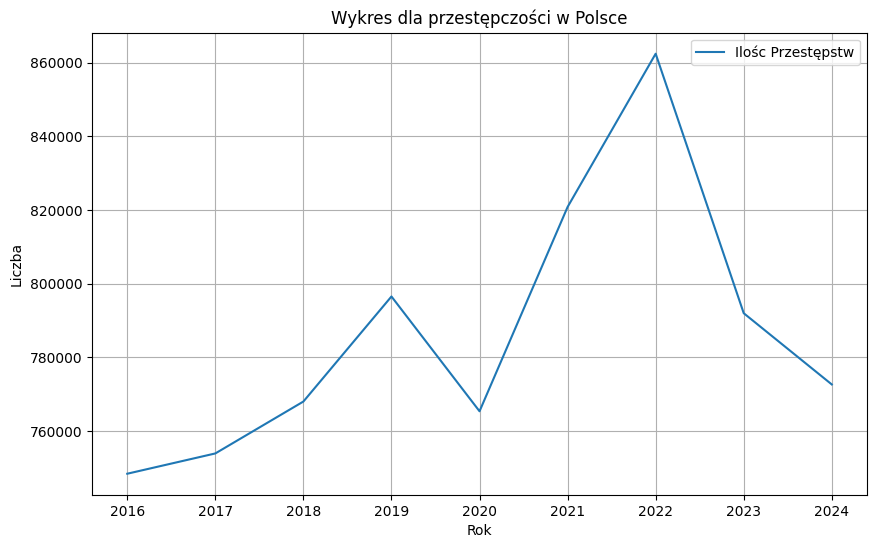

In [345]:
df_poland_ogolem.set_index('Rok', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_poland_ogolem.index, df_poland_ogolem['Liczba'], label='Ilośc Przestępstw')
plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Wykres dla przestępczości w Polsce')
plt.legend()
plt.grid(True)
plt.show()

2019 i 2022 - ktore przestępstwo, kwartał, wojewodztwo

Spadek w 2020, mimo ze od tego roku zaczeto liczyc kolejne kategorie

### KWartały w polsce od 2016 (przestępstwa ogółem)

najliczniejsze

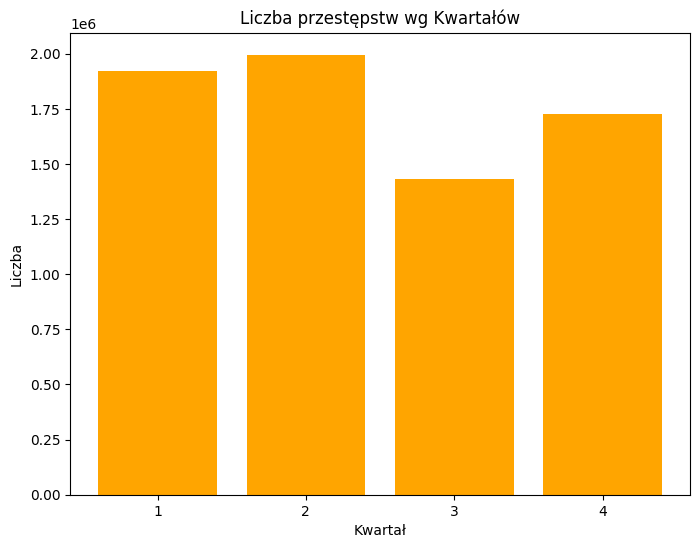

In [374]:
df_quarters = df_final.copy()

df_quarters = df_quarters[df_quarters["Województwo"] == "POLSKA"]
df_quarters = df_quarters[df_quarters['Przestępstwo'] == 'ogółem']
df_quarters = df_quarters[df_quarters['Kwartał'] != 0]

quarters_sum = df_quarters.groupby('Kwartał')['Liczba'].sum().sort_values(ascending=False)


plt.figure(figsize=(8,6))
plt.bar(quarters_sum.index, quarters_sum.values, color='orange')
plt.title('Liczba przestępstw wg Kwartałów')
plt.ylabel('Liczba')
plt.xlabel('Kwartał')
plt.xticks([1, 2, 3, 4], labels=['1', '2', '3', '4'])
plt.show()

Wykres przez lata

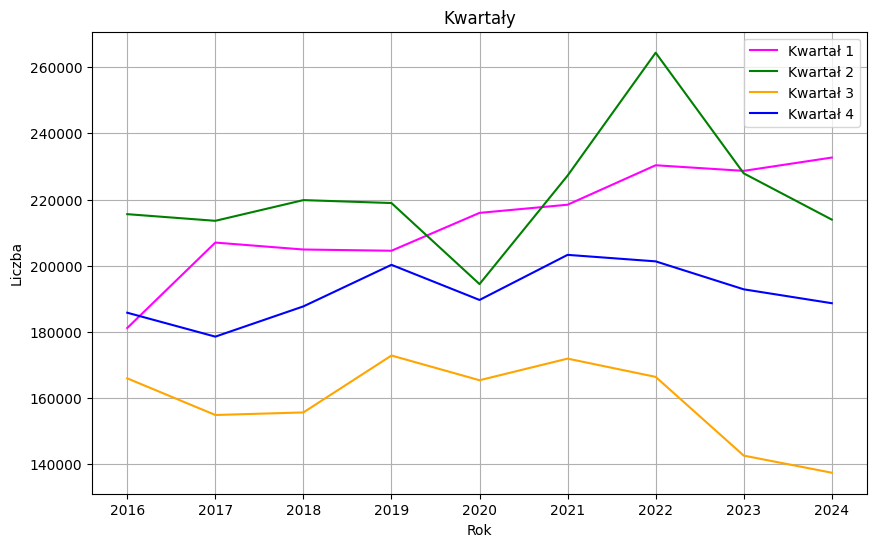

In [375]:
df_q1 = df_quarters[df_quarters["Kwartał"] == 1]
df_q2 = df_quarters[df_quarters["Kwartał"] == 2]
df_q3 = df_quarters[df_quarters["Kwartał"] == 3]
df_q4 = df_quarters[df_quarters["Kwartał"] == 4]


df_q1.set_index('Rok', inplace=True)
df_q2.set_index('Rok', inplace=True)
df_q3.set_index('Rok', inplace=True)
df_q4.set_index('Rok', inplace=True)

plt.figure(figsize=(10, 6)) 
plt.plot(df_q1.index, df_q1['Liczba'], label='Kwartał 1',color='magenta')
plt.plot(df_q2.index, df_q2['Liczba'], label='Kwartał 2',color='green')
plt.plot(df_q3.index, df_q3['Liczba'], label='Kwartał 3',color='orange')
plt.plot(df_q4.index, df_q4['Liczba'], label='Kwartał 4',color='blue')

plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Kwartały')
plt.legend()
plt.grid(True)
plt.show()

### Najczęstsze i najrzadsze przestepstwa w Polsce od 2020 roku

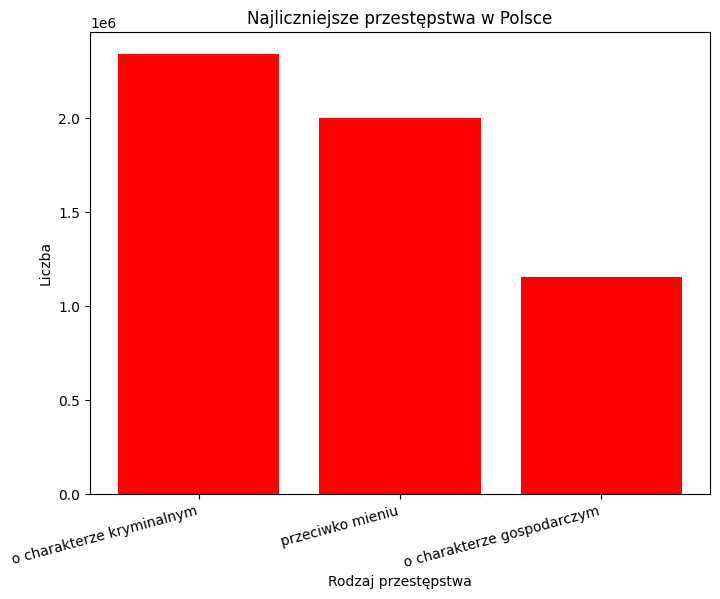

In [346]:
df_poland_2020 = df_since_2020[df_since_2020["Województwo"] == "POLSKA"]
df_poland_2020_year = df_poland_2020[df_poland_2020["Kwartał"]==0]

df_top_crimes = df_poland_2020_year[df_poland_2020_year['Przestępstwo'] != 'ogółem']

crime_sum = df_top_crimes.groupby('Przestępstwo')['Liczba'].sum().sort_values(ascending=False)
top3 = crime_sum.nlargest(3)


plt.figure(figsize=(8,6))
plt.bar(top3.index, top3.values, color='red')
plt.title('Najliczniejsze przestępstwa w Polsce')
plt.ylabel('Liczba')
plt.xlabel('Rodzaj przestępstwa')
plt.xticks(rotation=15, ha='right')
plt.show()

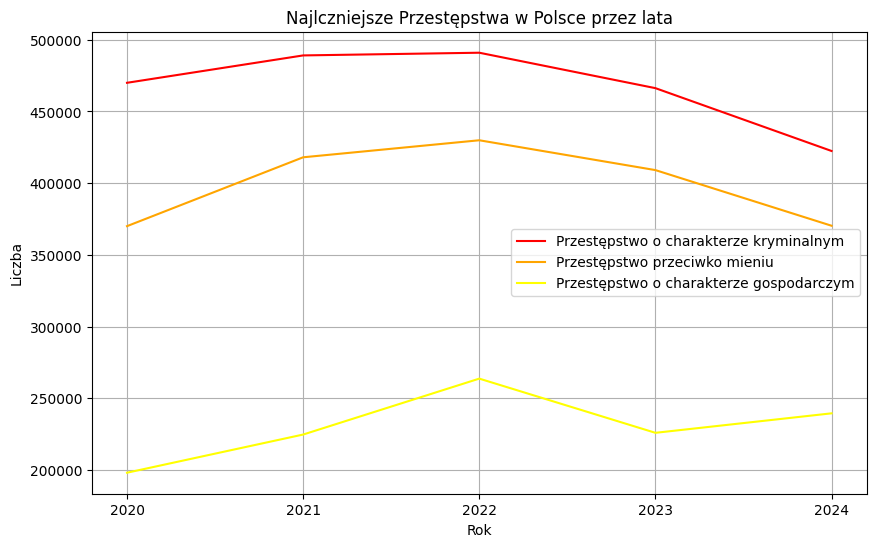

In [379]:
df1 = df_top_crimes[df_top_crimes['Przestępstwo'] == 'o charakterze kryminalnym']
df2 = df_top_crimes[df_top_crimes['Przestępstwo'] == 'przeciwko mieniu']
df3 = df_top_crimes[df_top_crimes['Przestępstwo'] == 'o charakterze gospodarczym']

df1.set_index('Rok', inplace=True)
df2.set_index('Rok', inplace=True)
df3.set_index('Rok', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Liczba'], label='Przestępstwo o charakterze kryminalnym',color='red')
plt.plot(df2.index, df2['Liczba'], label='Przestępstwo przeciwko mieniu',color='orange')
plt.plot(df3.index, df3['Liczba'], label='Przestępstwo o charakterze gospodarczym',color='yellow')

plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Najlczniejsze Przestępstwa w Polsce przez lata')
plt.xticks(df1.index)
plt.legend()
plt.grid(True)
plt.show()

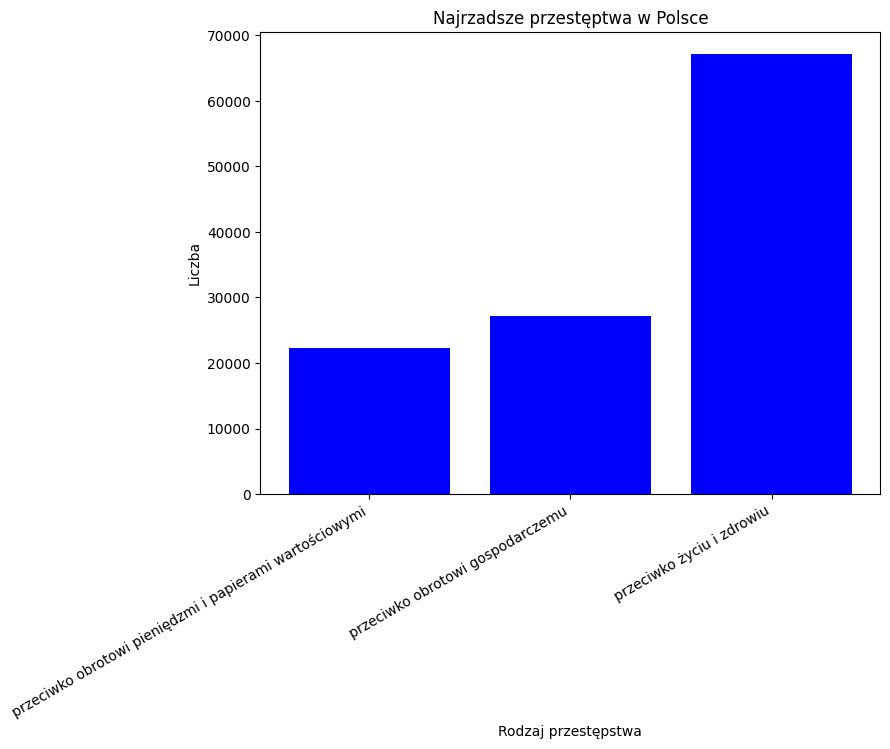

In [348]:
down3 = crime_sum.nsmallest(3)


plt.figure(figsize=(8,6))
plt.bar(down3.index, down3.values, color='blue')
plt.title('Najrzadsze przestęptwa w Polsce')
plt.ylabel('Liczba')
plt.xlabel('Rodzaj przestępstwa')
plt.xticks(rotation=30, ha='right')
plt.show()

3. 2022 - skok, czego najwięcej i w jakim województwie - procentowo
kwartały - jakie przestępstwo najliczniejsze w którym kwartale
4. województwa wszystkie
5. co góruje w każdym województwie a co najrzadziej
6. topki województw ogólnie
forecasting - dane od 2020, dane od 2016
7. wskaźniki na województwa
co wpływa - bezrobocie, bezdomność

# Dane dla Województw